# Matrix Multiplication

This notebook has been translated from [ImageJ Macro](https://clij.github.io/clij2-docs/md/matrix_multiply/)

It shows how to perform a matrix multiplication in the GPU.

## Initialize GPU

In [1]:
import pyclesperanto as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("TX")

(OpenCL) NVIDIA GeForce RTX 2080 SUPER (OpenCL 3.0 CUDA)
	Type: GPU
	Compute Units: 48
	Global Memory Size: 8366 MB
	Maximum Object Size: 2091 MB

## Define two arrays (vectors) and push them to the GPU

In [2]:
array1 = np.asarray([1, 2, 3, 4, 5])
array2 = np.asarray([6, 7, 8, 9, 10])

vector1 = cle.push(array1)
vector2 = cle.push(array2)

## In order to multiplicate matrices, the input matrices must be of size (n * m) and (m * n)
Therefore, we transpose one of our vectors:

In [3]:
vector1_t = cle.transpose_xy(vector1)

print("Vector 1 (transposed): " + str(vector1_t))
print("Vector 2: " + str(vector2))

Vector 1 (transposed): [[1]
 [2]
 [3]
 [4]
 [5]]
Vector 2: [ 6  7  8  9 10]


In [4]:
# matrix = cle.create([vector1_t.shape[0], vector2.shape[0]])
matrix = cle.multiply_matrix(vector1_t, vector2)

print(matrix)

[[ 6  7  8  9 10]
 [12 14 16 18 20]
 [18 21 24 27 30]
 [24 28 32 36 40]
 [30 35 40 45 50]]


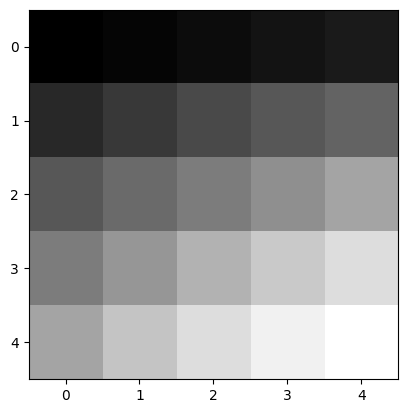

In [5]:
cle.imshow(matrix)

## Element by element multiplication of two matrices

[[ 3  6  6  3  3]
 [ 7  7 14  9  1]
 [15 10  0 10  0]
 [16  9 23 20 34]
 [29  2 16  3 26]]


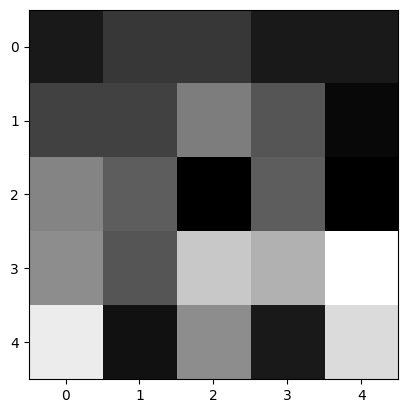

In [6]:
# generate another matrix of the same size with random values
another_matrix = cle.push(np.random.random(matrix.shape))

# element by element multiplication
matrix_element_wise_multiplied = cle.multiply_images(matrix, another_matrix)

print(matrix_element_wise_multiplied)

cle.imshow(matrix_element_wise_multiplied)

## Element by element multiplication of a matrix with a scalar

In [7]:
elements_times_2 = cle.multiply_image_and_scalar(matrix, scalar=2)
print(elements_times_2)

[[ 12  14  16  18  20]
 [ 24  28  32  36  40]
 [ 36  42  48  54  60]
 [ 48  56  64  72  80]
 [ 60  70  80  90 100]]
